# CA-04: Ensemble Models for Income Classification

In [1]:
# Import dataset
import pandas as pd

url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"
df = pd.read_csv(url)
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [2]:
#From CA3, we determined that we must drop education_num_bin since its highly correlated with education bin.

df.drop('education_num_bin', axis=1, inplace=True)

In [3]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_bin workclass_bin            age_bin   flag  y  
0  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1  c. Bachelors     b. income           e. 40-55  train  0  
2        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3        a. Low     b. income           e. 40-55  train  0  
4  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [4]:
# Separate features from target + flag
X = df.drop(columns=['y', 'flag'])
y = df['y']

# One-hot encode ALL features at once
X_encoded = pd.get_dummies(X, drop_first=True)

# Split encoded features
X_train = X_encoded[df['flag'] == 'train']
X_test  = X_encoded[df['flag'] == 'test']

# Split target
y_train = y[df['flag'] == 'train']
y_test  = y[df['flag'] == 'test']

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

In [6]:
# Define range of n_estimators values to evaluate model performance across different ensemble sizes
n_values = [50,100,150,200,250,300,350,400,450,500]

In [7]:
# Train and evaluate Random Forest across varying n_estimators, storing Accuracy and AUC scores
from sklearn.ensemble import RandomForestClassifier

rf_acc = []
rf_auc = []

for n in n_values:
    model = RandomForestClassifier(n_estimators=n, random_state=101)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    rf_acc.append(accuracy_score(y_test, y_pred))
    rf_auc.append(roc_auc_score(y_test, y_prob))

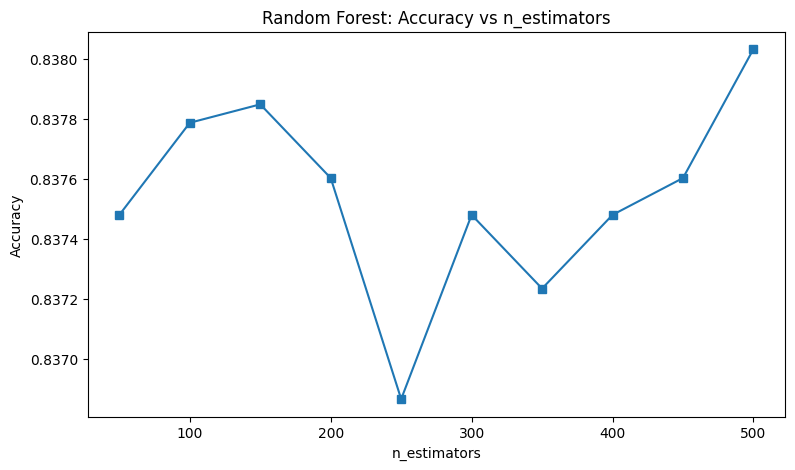

In [8]:
# Plot Random Forest Accuracy as a function of n_estimators
plt.figure(figsize=(9,5))
plt.plot(n_values, rf_acc, marker='s')
plt.title("Random Forest: Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

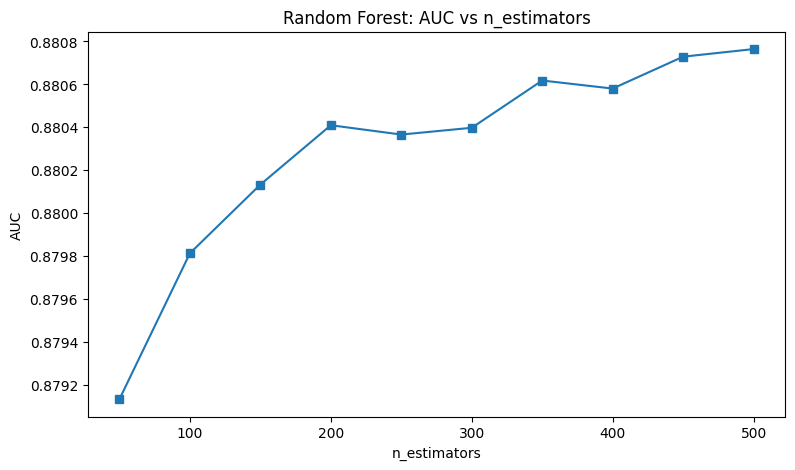

In [9]:
# Plot Random Forest AUC as a function of n_estimators
plt.figure(figsize=(9,5))
plt.plot(n_values, rf_auc, marker='s')
plt.title("Random Forest: AUC vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

**Write your observations about the Classifier’s behavior with respect to the number of estimators.**

The maximum accuracy is at 500 estimators and the minimum accuracy is at around 250 estimators. There isn't a clear or super strong positive correlation between number of estimators and accuracy as accuracy scores below 250 estimators range between 0.8374 and 0.8378.


The AUC vs n_estimators graph shows a steep increase in AUC between 0 and 200 estimators and then flattening out after 200 estimators. From 200 estimators onwards there is a slightly positive slope so the maximum AUC is given at 500 estimators with a score of 0.8808.

The relatively stable performance across estimator sizes suggests that the model benefits from averaging many trees, but beyond a certain point the marginal improvement from additional trees becomes minimal.


**Is there an optimal value of the estimator within the given range?**


While no estimator count achieves perfect performance, 500 estimators provides the strongest results within the tested range. In both graphs, the maximum y-value of the graph is given at 500 estimators. Therefore at 500 estimators the AUC is 0.8808 and accuracy is 0.8380.


In [10]:
# Train and evaluate AdaBoost across varying n_estimators, storing Accuracy and AUC scores
from sklearn.ensemble import AdaBoostClassifier

ada_acc = []
ada_auc = []

for n in n_values:
  model = AdaBoostClassifier(n_estimators=n, random_state=101)
  model.fit(X_train, y_train)


  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]

  ada_acc.append(accuracy_score(y_test, y_pred))
  ada_auc.append(roc_auc_score(y_test, y_prob))

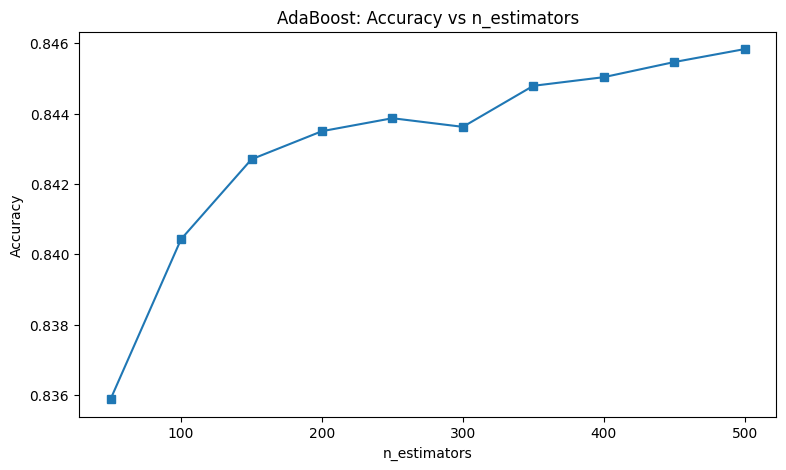

In [11]:
# Plot AdaBoost Accuracy as a function of n_estimators
plt.figure(figsize=(9,5))
plt.plot(n_values, ada_acc, marker='s')
plt.title("AdaBoost: Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

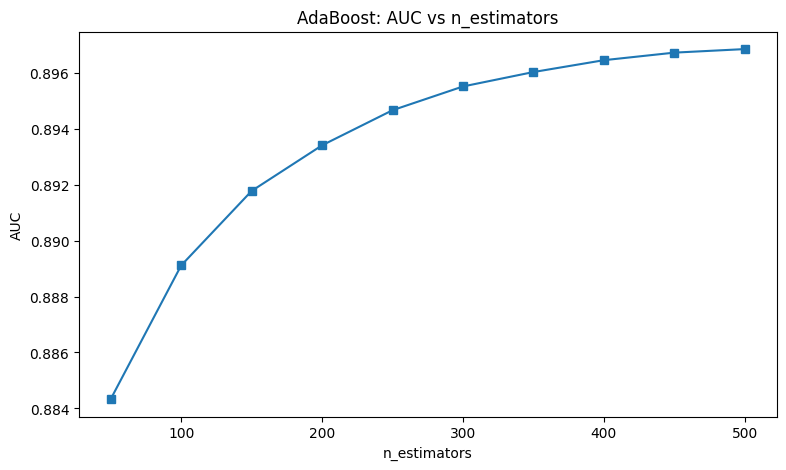

In [12]:
# Plot AdaBoost AUC as a function of n_estimators
plt.figure(figsize=(9,5))
plt.plot(n_values, ada_auc, marker='s')
plt.title("AdaBoost: AUC vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

**Write your observations about the Classifier’s behavior with respect to the number of estimators**


The graph accuracy vs estimators graphs follows a relatively logarithmic graph, which signals that significant increase of accuracy is only relevant for under 400 estimators. After 400 estimators the slope flattens. The maximum accuracy as shown in the graph is at 500 estimators.


The AUC vs estimators graph also follows a logarithmic curve with AUC flattening out at around 300 estimators. There is a steep increase in AUC levels from around 20 to 300 estimators. THe maximum AUC as shown in the graph is at 500 estimators.

The gradual improvement with more estimators indicates that the boosting process continues correcting previous errors, although the gains become smaller as the number of trees increases.

**Is there an optimal value of the estimator within the given range?**


Although no estimator achieves perfect performance, 500 estimators provides the best observed trade-off within the tested range. Therefore all scores shown can be considered “better” but not optimal.


In [13]:
# Train and evaluate Gradient Boosting across varying n_estimators, storing Accuracy and AUC scores

from sklearn.ensemble import GradientBoostingClassifier

gb_acc = []
gb_auc = []

for n in n_values:
    model = GradientBoostingClassifier(n_estimators=n, random_state=101)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    gb_acc.append(accuracy_score(y_test, y_pred))
    gb_auc.append(roc_auc_score(y_test, y_prob))

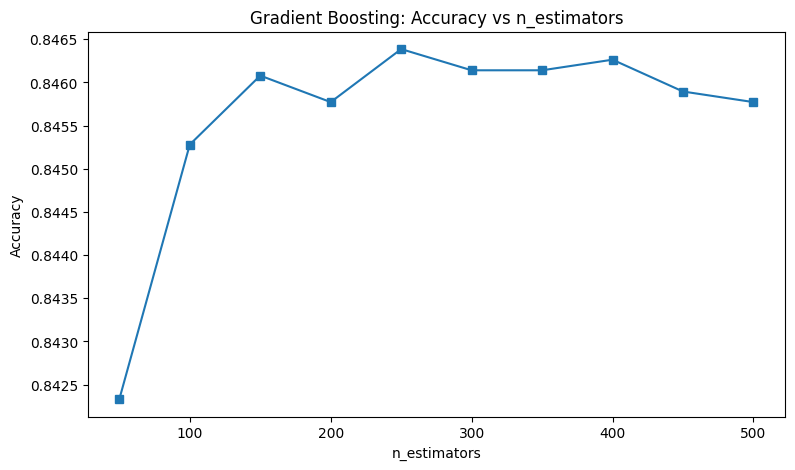

In [14]:
# Plot Gradient Boosting Accuracy as a function of n_estimators
plt.figure(figsize=(9,5))
plt.plot(n_values, gb_acc, marker='s')
plt.title("Gradient Boosting: Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

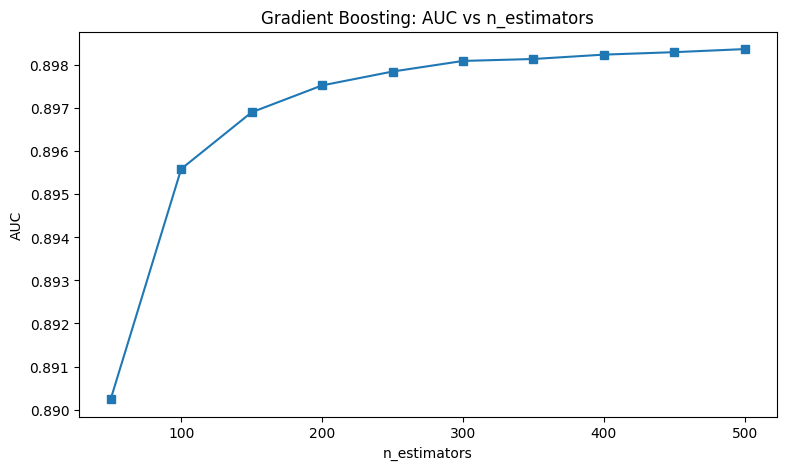

In [15]:
# Plot Gradient Boosting AUC as a function of n_estimators
plt.figure(figsize=(9,5))
plt.plot(n_values, gb_auc, marker='s')
plt.title("Gradient Boosting: AUC vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

**Write your observations about the Classifier’s behavior with respect to the number of estimators**


The Accuracy vs estimators graph displays a sharp increase in accuracy from 0 to 100 estimators and then varying accuracy between 100 and 500 estimators. The maximum accuracy is shown at around 250 estimators. While the accuracy does decrease after 250 estimators the curve remains somewhat flat.


The AUC vs estimators graph resembles a logarithmic graph. There is a sharp increase in AUC between 0 and 100 estimators but after 300 estimators the increase in AUC is negligible. The highest AUC shown is at 500 estimators.

The small fluctuations in accuracy around the peak suggest that the model reaches a performance plateau, where additional estimators provide limited practical benefit.

**Is there an optimal value of the estimator within the given range?**


The model reaches its peak accuracy at 250 estimators, while AUC continues to improve slightly up to 500, suggesting diminishing but continued gains.

In [16]:
# Train and evaluate XGBoost across varying n_estimators, storing Accuracy and AUC scores

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Convert DataFrame to NumPy arrays to avoid potential XGBoost issues
# with special characters in one-hot encoded column names
x_train_np = X_train.to_numpy()
x_test_np  = X_test.to_numpy()

xgb_acc = []
xgb_auc = []

for n in n_values:
    xgb_model = XGBClassifier(n_estimators=n, random_state=101, eval_metric='logloss')
    xgb_model.fit(x_train_np, y_train)

    y_pred = xgb_model.predict(x_test_np)
    y_prob = xgb_model.predict_proba(x_test_np)[:, 1]

    xgb_acc.append(accuracy_score(y_test, y_pred))
    xgb_auc.append(roc_auc_score(y_test, y_prob))


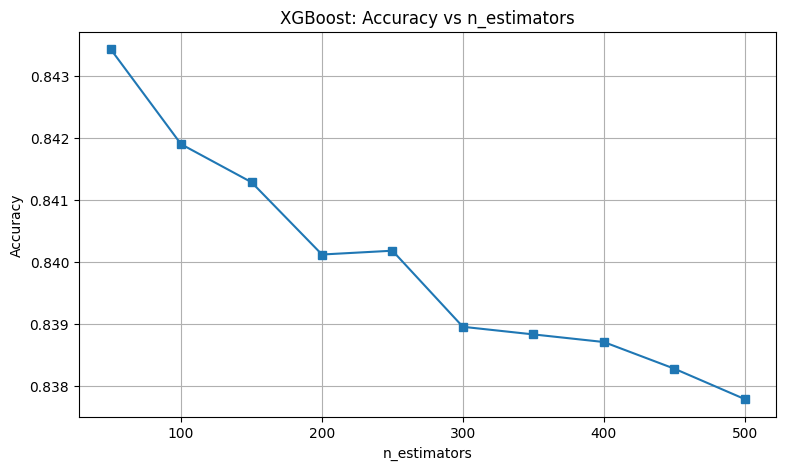

In [17]:
# Plot XGBoost Accuracy as a function of n_estimators
plt.figure(figsize=(9,5))
plt.plot(n_values, xgb_acc, marker='s')
plt.title("XGBoost: Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

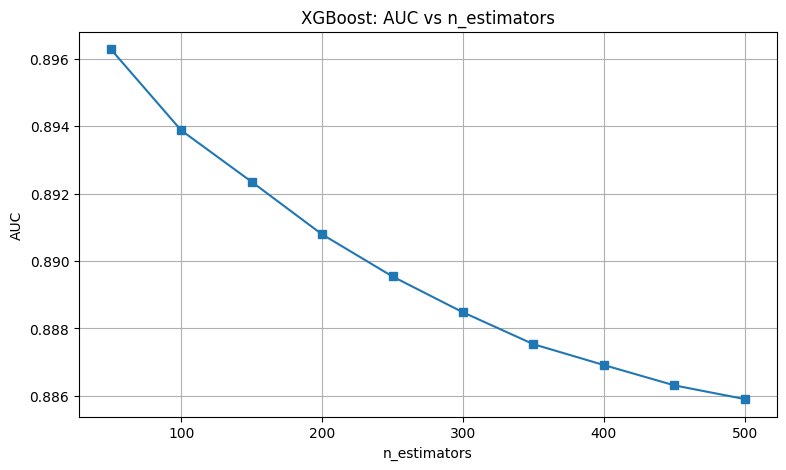

In [18]:
# Plot XGBoost AUC as a function of n_estimators
plt.figure(figsize=(9,5))
plt.plot(n_values, xgb_auc, marker='s')
plt.title("XGBoost: AUC vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.grid(True)
plt.show()

**Write your observations about the Classifier’s behavior with respect to the number of estimators**


The XBG graphs are the most different from the others. The accuracy vs estimators graph shows a relatively negative linear line, with accuracy peaking at lower estimators. There is a small increase and decrease in accuracy at around 250 estimators. The highest accuracy is at about 50 estimators.


The AUC vs estimators graph shows that performance peaks at approximately 50 estimators and gradually declines as more trees are added. In this case, XGBoost achieves its best performance at a lower number of estimators (50), after which performance decreases, indicating potential overfitting as additional trees are introduced.

**Is there an optimal value of the estimator within the given range?**

Neither graph displays an optimal value as neither accuracy of AUC have a value of 1.


In [19]:
# Extract best results for each model

# Random Forest
rf_best = {
    "best_acc_n": n_values[np.argmax(rf_acc)],
    "best_acc": max(rf_acc),
    "best_auc_n": n_values[np.argmax(rf_auc)],
    "best_auc": max(rf_auc)
}

# AdaBoost
ada_best = {
    "best_acc_n": n_values[np.argmax(ada_acc)],
    "best_acc": max(ada_acc),
    "best_auc_n": n_values[np.argmax(ada_auc)],
    "best_auc": max(ada_auc)
}

# Gradient Boosting
gb_best = {
    "best_acc_n": n_values[np.argmax(gb_acc)],
    "best_acc": max(gb_acc),
    "best_auc_n": n_values[np.argmax(gb_auc)],
    "best_auc": max(gb_auc)
}

# XGBoost
xgb_best = {
    "best_acc_n": n_values[np.argmax(xgb_acc)],
    "best_acc": max(xgb_acc),
    "best_auc_n": n_values[np.argmax(xgb_auc)],
    "best_auc": max(xgb_auc)
}

In [20]:
# Compile best Accuracy and AUC results for all models into a comparison table
final_comparison_table = pd.DataFrame([
    ["Random Forest",
     rf_best["best_acc_n"], rf_best["best_acc"],
     rf_best["best_auc_n"], rf_best["best_auc"]],

    ["AdaBoost",
     ada_best["best_acc_n"], ada_best["best_acc"],
     ada_best["best_auc_n"], ada_best["best_auc"]],

    ["Gradient Boost",
     gb_best["best_acc_n"], gb_best["best_acc"],
     gb_best["best_auc_n"], gb_best["best_auc"]],

    ["XGBoost",
     xgb_best["best_acc_n"], xgb_best["best_acc"],
     xgb_best["best_auc_n"], xgb_best["best_auc"]],],
    columns=[
    "Model",
    "Best n (Accuracy)", "Best Accuracy",
    "Best n (AUC)", "Best AUC"])

final_comparison_table


,Model,Best n (Accuracy),Best Accuracy,Best n (AUC),Best AUC
0,Random Forest,500,0.838032,500,0.880764
1,AdaBoost,500,0.845833,500,0.896852
2,Gradient Boost,250,0.846385,500,0.898369
3,XGBoost,50,0.843437,50,0.896289


**The random forest ensemble method reduces variance as the final prediction is derived through the average of each smaller model. It can handle data with a high variance. Therefore, it can limit overfitting and increase accuracy as well as AUC as the final model is always an average of many attempts and smooths out outlier noise.**

**The AdaBoost boosting algorithm is more sensitive to noisy data and outliers as the final prediction is made from trees that are continuously “improved”. This method can result in the models focusing too much on outliers that need “fixing”. However, this method works well with clean data. With clean data AdaBoost targets the correct biases to fix.**

**The Gradient Boosting is similar to the AdaBoost method but instead of reweighting the data it tries to minimize the loss function. It focuses on the incorrect answers. Therefore, it can be more accurate than a random forest.**

**The XGBoost method is like gradient boosting, but focuses on regularization and tree pruning. The tree pruning and regularization limits the chances of overfitting and the model focuses too much on highly varying data. In our results, Gradient Boosting achieved the strongest overall performance, while XGBoost converged quickly but did not outperform the other boosting methods at higher estimator counts.**